importing the Lib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

Loading The Datas

In [2]:
df = pd.read_csv("data/StudentsPerformance.csv")


In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

Checking Null or NaN Values

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Checking The Duplicated datas

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Getting the No. unique value from each column

In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

Describing the datas

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


1. the mean for math score,	reading score,	writing score are b/w 66 to 68
2. the std for all the score are nearly same b/w 14.6 to 15.19
3. the min value for math score is 0,for writing score is 10, for reading score is 17

## ED

Getting the unique variables names in each columns

In [10]:
print("Categories in 'gender' variable : ",end=" " )
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable : ",end=" " )
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable : ",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable : ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable : ",end=" " )
print(df['test preparation course'].unique())

Categories in 'gender' variable :  ['female' 'male']
Categories in 'race/ethnicity' variable :  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable :  ['standard' 'free/reduced']
Categories in 'test preparation course' variable :  ['none' 'completed']


In [11]:
num_feat=[feature for feature in df.columns if df[feature].dtype != 'O' ]
cat_feat=[feature for feature in df.columns if df[feature].dtype == 'O' ]

print("we have {} numerical feature : {}".format(len(num_feat),num_feat))
print("\nwe have {} categorical feature : {}".format(len(cat_feat),cat_feat))

we have 3 numerical feature : ['math score', 'reading score', 'writing score']

we have 5 categorical feature : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


Adding Columns for "Total Score" and "Average"

In [12]:
df['total score']=df['math score'] + df['reading score'] + df['writing score']
df['average']=df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
reading_full = df[df['reading score']==100]['average'].count()
writing_full = df[df['writing score']==100]['average'].count()
math_full = df[df['math score']==100]['average'].count()

print(f'Number of students with full marks in maths : {math_full}')
print(f'Number of students with full marks in writing : {writing_full}')
print(f'Number of students with full marks in reading : {reading_full}')

Number of students with full marks in maths : 7
Number of students with full marks in writing : 14
Number of students with full marks in reading : 17


In [14]:
reading_less_20 = df[df['reading score']<=20]['average'].count()
writing_less_20 = df[df['writing score']<=20]['average'].count()
math_less_20 = df[df['math score']<=20]['average'].count()

print(f'Number of students with less than 20 marks in maths : {math_less_20}')
print(f'Number of students with less than 20 marks in writing : {writing_less_20}')
print(f'Number of students with less than 20 marks in reading : {reading_less_20}')

Number of students with less than 20 marks in maths : 4
Number of students with less than 20 marks in writing : 3
Number of students with less than 20 marks in reading : 1


1. we got students perform worst in math
2. best performance in reading

## ED(Visualizing)

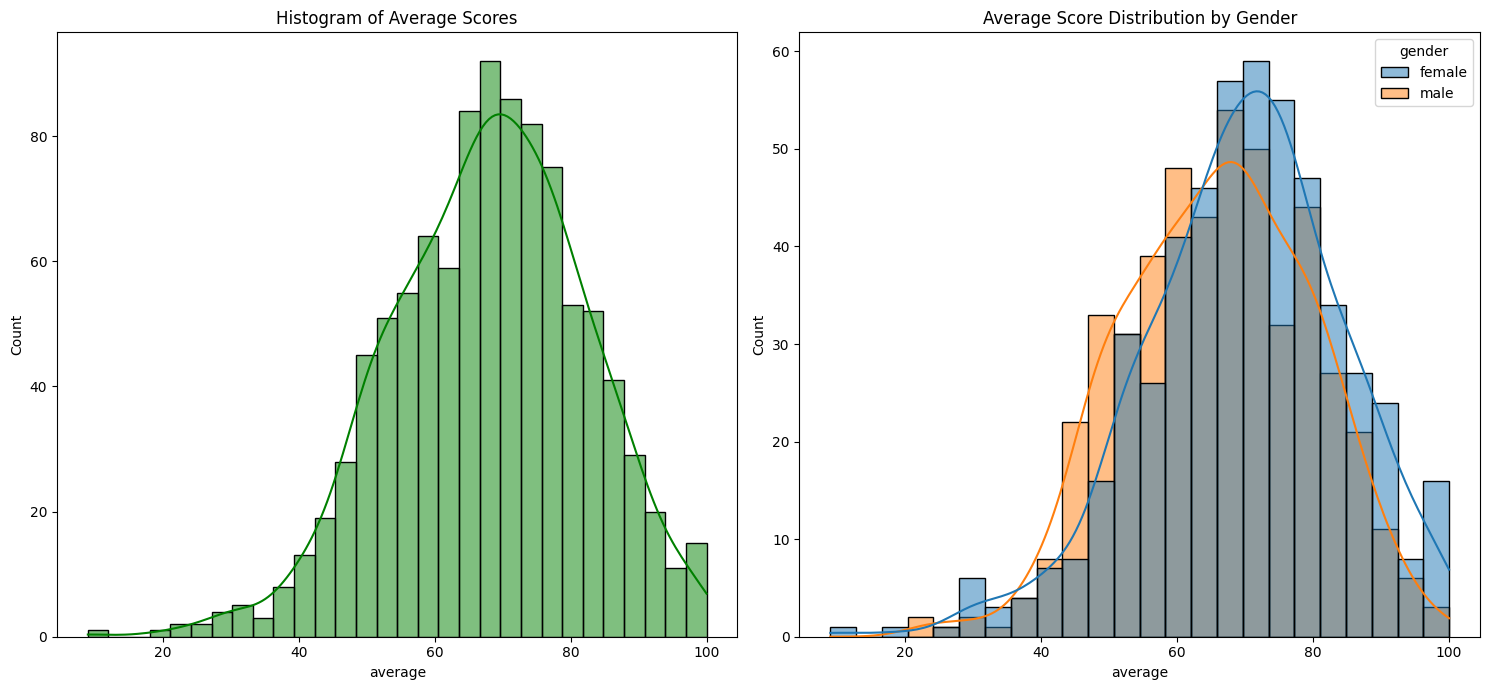

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(data=df, x='average', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title("Histogram of Average Scores")
sns.histplot(data=df, x='average', kde=True, hue='gender', ax=axs[1])
axs[1].set_title("Average Score Distribution by Gender")
plt.tight_layout()
plt.show()

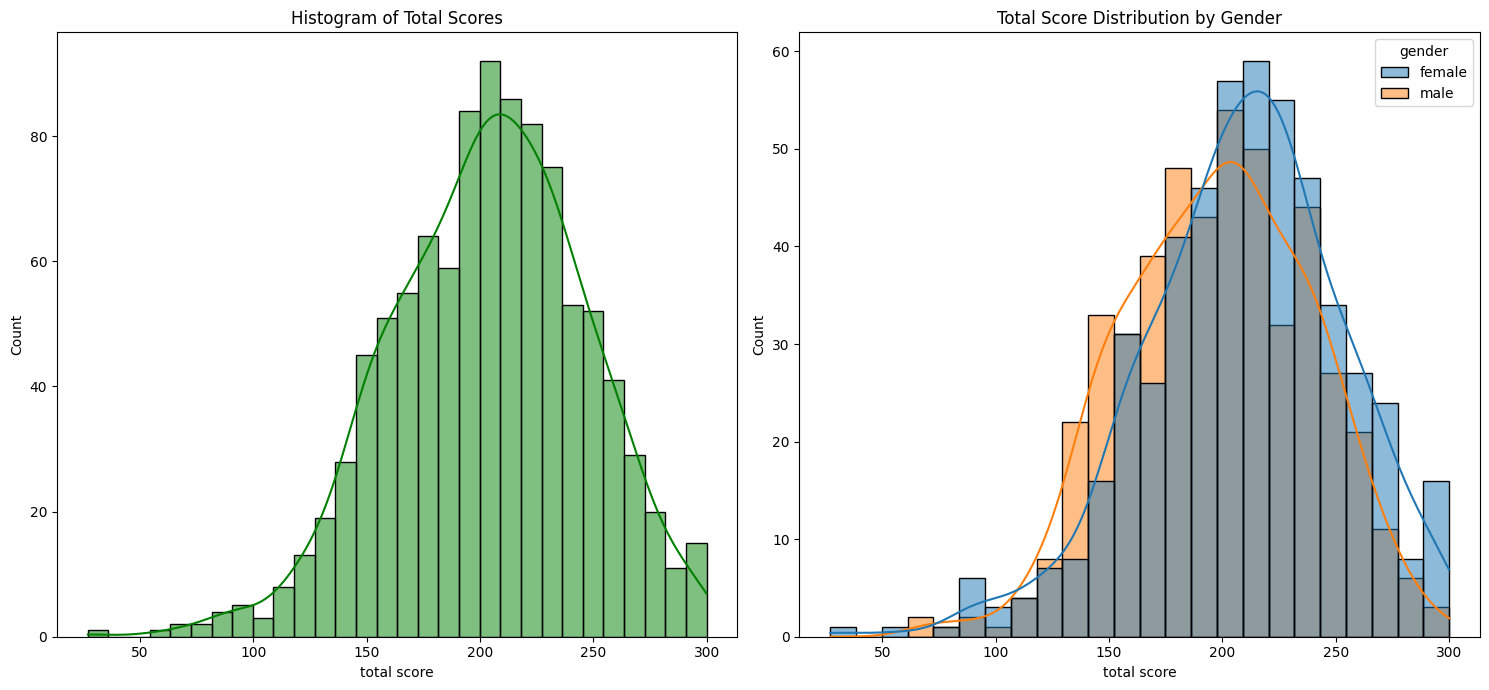

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(data=df, x='total score', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title("Histogram of Total Scores")
sns.histplot(data=df, x='total score', kde=True, hue='gender', ax=axs[1])
axs[1].set_title("Total Score Distribution by Gender")
plt.tight_layout()
plt.show()

## Insights

* The Female Stu Performs well than male stu

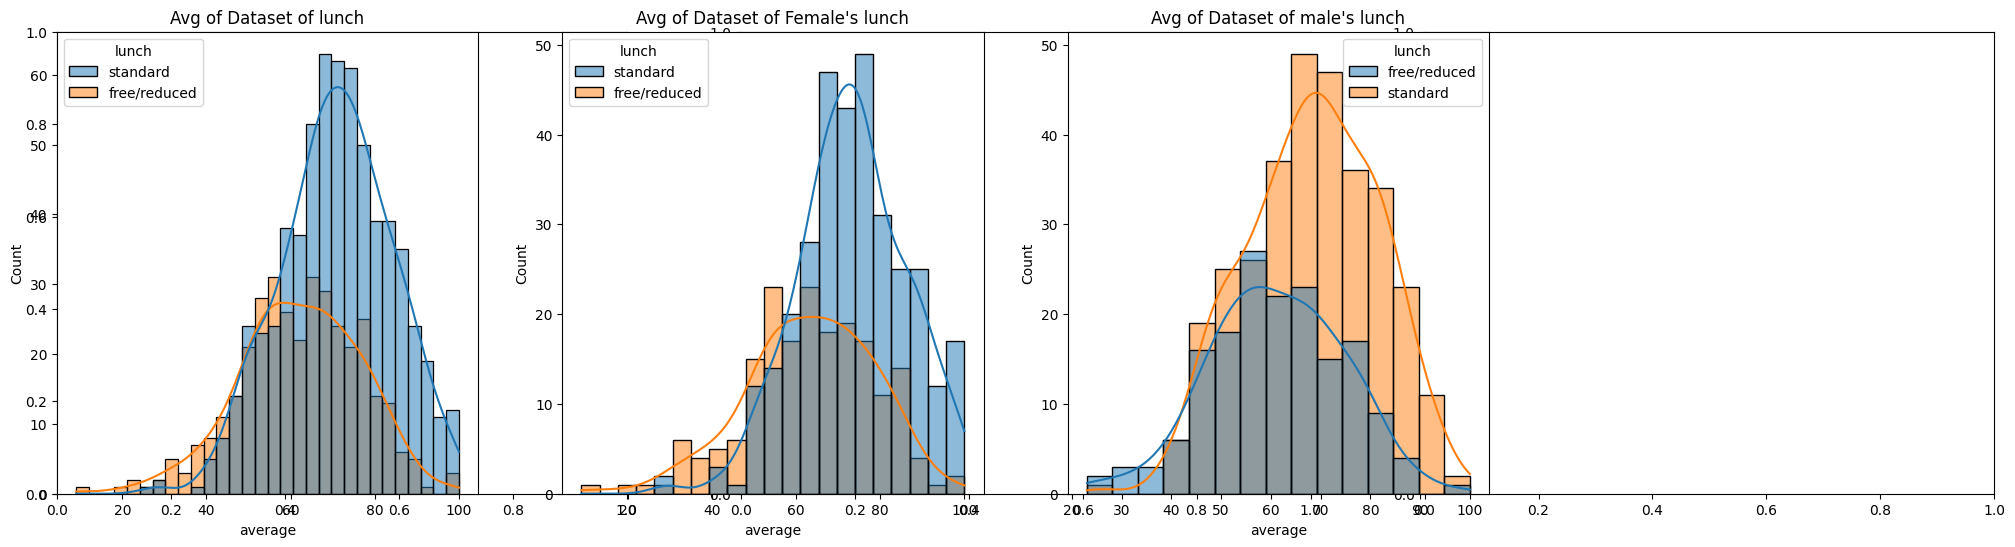

In [ ]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
plt.title("Avg of lunch")
sns.histplot(data=df, x='average', bins=30, kde=True, hue='lunch')
plt.subplot(142)
plt.title("Avg of Female's lunch")
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch')
plt.subplot(143)
plt.title("Avg of male's lunch")
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch')
plt.show()